In [33]:
import numpy as np
import math
import pandas as pd
from timeit import default_timer as timer  
import datetime

from pandas_datareader import data
import pandas_datareader as web
import seaborn as sns

import datetime
from datetime import timezone
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')

from scipy.optimize import minimize
from scipy import stats
from random import sample
import statsmodels.api as sm

import yahoo_finance as yf  
import yahoo_fin.stock_info as si

import statsmodels
from IPython.display import display, clear_output

from pathlib import Path


In [34]:
DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
TRADING_STRATEGY_FILEPATH = './Trading Strategy'

In [35]:
df = pd.read_csv(DATASET_FILEPATH, index_col = 0)
format = "%Y-%m-%d %H"
df.index = [datetime.strptime(i, format) for i in df.index]
df

,Bitcoin,Bitcoin_median,Open
2017-09-13 01:00:00,0.814122,0.891900,4128.005439
2017-09-13 02:00:00,0.812894,0.850564,4066.801167
2017-09-13 03:00:00,0.853220,0.846102,3999.225167
2017-09-13 04:00:00,0.838326,0.846102,3959.409667
2017-09-13 05:00:00,0.782210,0.815073,3995.046667
...,...,...,...
2019-01-22 18:00:00,0.706585,0.819227,3584.926897
2019-01-22 19:00:00,0.889864,0.935381,3585.858545
2019-01-22 20:00:00,0.687378,0.781042,3585.295893
2019-01-22 21:00:00,0.767968,0.853416,3579.910755


#### Trading Strategy Backtesting <a class="anchor" id="section_5_3"></a>

In [36]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(TRADING_STRATEGY_FILEPATH)
from custom_trading_engine import customNLP
from signals import *
from strategies import *

In [37]:
#best strategy play the opposite (with stoploss)
cash = []
for stop in range(1, 50):
    signal = Signal2(df['Bitcoin'])
    strategy = BitcoinNLPStrategy2()
    strategy.add_signal(signal)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(stop/1000)
    
    algo.run(split = True, verbose = False)
    cash.append(algo.cash)
#plt.plot(list(algo.metrics['Portfolio Marked']))

./Trading Strategy\signals.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return -10000 * (self.data[datetime] - mean) / stdv


KeyboardInterrupt: 

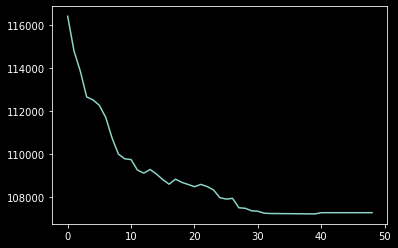

In [28]:
plt.plot(cash)

In [44]:
signal = Signal2(df['Bitcoin'])
strategy = BitcoinNLPStrategy2()
strategy.add_signal(signal)
algo = customNLP(100000, df['Open'], strategy)
algo.set_stoploss(0.01)

algo.run(split = True)

./Trading Strategy\signals.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return -10000 * (self.data[datetime] - mean) / stdv


buying  10000.0  BTC at  4066.801166666666  $
Stoploss Triggered at  3999.2251666666666
closing  10000.0  BTC at  4026.1331549999995  $
selling  5116.704124460492  BTC at  3959.409666666667  $
closing  -5116.704124460492  BTC at  3995.046666666667  $
buying  15615.07119214329  BTC at  3995.046666666667  $
closing  15615.07119214329  BTC at  4005.1322641509432  $
selling  9058.9195065826  BTC at  4005.1322641509432  $
closing  -9058.9195065826  BTC at  3951.8985  $
buying  9672.166749868613  BTC at  3951.8985  $
closing  9672.166749868613  BTC at  3969.537118644068  $
selling  2768.56430570299  BTC at  3969.537118644068  $
closing  -2768.56430570299  BTC at  3926.753000000001  $
selling  11764.100552880185  BTC at  3926.753000000001  $
closing  -11764.100552880185  BTC at  3839.3781666666655  $
buying  7979.421956534014  BTC at  3839.3781666666655  $
closing  7979.421956534014  BTC at  3833.9163333333327  $
selling  436.21550526430946  BTC at  3833.9163333333327  $
closing  -436.2155052

closing  -13837.575829076375  BTC at  5696.920333333334  $
selling  8838.22644580603  BTC at  5696.920333333334  $
closing  -8838.22644580603  BTC at  5708.544915254237  $
selling  4750.40503658581  BTC at  5708.544915254237  $
closing  -4750.40503658581  BTC at  5760.435172413794  $
selling  8315.491999778922  BTC at  5760.435172413794  $
closing  -8315.491999778922  BTC at  5760.435172413794  $
buying  10000.0  BTC at  6071.602833333333  $
closing  10000.0  BTC at  6059.425423728813  $
selling  12616.396621235523  BTC at  6059.425423728813  $
closing  -12616.396621235523  BTC at  6074.8161666666665  $
buying  15637.53293133157  BTC at  6074.8161666666665  $
closing  15637.53293133157  BTC at  6093.565964912281  $
selling  6684.950068546559  BTC at  6093.565964912281  $
closing  -6684.950068546559  BTC at  6073.152166666667  $
buying  18621.947369455862  BTC at  6073.152166666667  $
closing  18621.947369455862  BTC at  6075.103666666666  $
buying  1192.701086893321  BTC at  6075.10366

closing  1045.39016434092  BTC at  10781.130666666666  $
selling  7049.874038932102  BTC at  10781.130666666666  $
closing  -7049.874038932102  BTC at  10781.130666666666  $
buying  10000.0  BTC at  10936.92298245614  $
closing  10000.0  BTC at  10933.428000000002  $
selling  12797.724878708601  BTC at  10933.428000000002  $
closing  -12797.724878708601  BTC at  11042.695000000002  $
selling  5214.0119743506475  BTC at  11042.695000000002  $
closing  -5214.0119743506475  BTC at  11057.888666666668  $
selling  14345.139550816104  BTC at  11057.888666666668  $
closing  -14345.139550816104  BTC at  11147.868833333336  $
selling  6316.0227654425735  BTC at  11147.868833333336  $
closing  -6316.0227654425735  BTC at  11145.774833333337  $
selling  10299.182928124346  BTC at  11145.774833333337  $
closing  -10299.182928124346  BTC at  11127.178666666669  $
selling  16155.249738068635  BTC at  11127.178666666669  $
closing  -16155.249738068635  BTC at  11136.032500000005  $
buying  6727.50105

closing  -5597.23625251057  BTC at  7918.552173333334  $
buying  5855.923497071247  BTC at  7957.139333333333  $
closing  5855.923497071247  BTC at  8216.866499999998  $
selling  13028.242446924258  BTC at  8216.866499999998  $
closing  -13028.242446924258  BTC at  8175.662333333335  $
selling  6282.586696795305  BTC at  8175.662333333335  $
closing  -6282.586696795305  BTC at  8198.405  $
selling  16363.534760295053  BTC at  8198.405  $
closing  -16363.534760295053  BTC at  8197.558166666666  $
selling  1618.1863437145569  BTC at  8197.558166666666  $
closing  -1618.1863437145569  BTC at  8246.723333333333  $
selling  4482.282450563242  BTC at  8246.723333333333  $
Stoploss Triggered at  8343.517
closing  -4482.282450563242  BTC at  8329.190566666666  $
selling  6229.399848535699  BTC at  8069.997999999999  $
closing  -6229.399848535699  BTC at  8063.273333333332  $
buying  1225.2227997857665  BTC at  8063.273333333332  $
closing  1225.2227997857665  BTC at  8166.680833333333  $
buyin

closing  -10000.0  BTC at  9409.489666666665  $
buying  3972.583463141531  BTC at  9409.489666666665  $
closing  3972.583463141531  BTC at  9334.566666666668  $
buying  11406.580745843967  BTC at  9334.566666666668  $
closing  11406.580745843967  BTC at  9344.386333333332  $
selling  2164.1578186857605  BTC at  9344.386333333332  $
closing  -2164.1578186857605  BTC at  9364.645  $
buying  10644.861980212198  BTC at  9364.645  $
closing  10644.861980212198  BTC at  9303.165833333333  $
buying  3478.599132114776  BTC at  9303.165833333333  $
closing  3478.599132114776  BTC at  9292.639  $
selling  4926.7053621782525  BTC at  9292.639  $
closing  -4926.7053621782525  BTC at  9219.322500000002  $
selling  7395.351923034979  BTC at  9219.322500000002  $
closing  -7395.351923034979  BTC at  9103.923000000004  $
buying  6926.808116873083  BTC at  9103.923000000004  $
closing  6926.808116873083  BTC at  9130.901666666668  $
selling  1492.302364373634  BTC at  9130.901666666668  $
closing  -149

selling  14216.280112224546  BTC at  8277.259  $
closing  -14216.280112224546  BTC at  8338.018333333333  $
selling  8572.063341748135  BTC at  8338.018333333333  $
closing  -8572.063341748135  BTC at  8321.3235  $
buying  1830.5958899609504  BTC at  8321.3235  $
closing  1830.5958899609504  BTC at  8319.2965  $
selling  9380.038467751314  BTC at  8319.2965  $
closing  -9380.038467751314  BTC at  8338.93254237288  $
buying  8096.537811386935  BTC at  8338.93254237288  $
closing  8096.537811386935  BTC at  8356.404333333332  $
selling  4676.286436650476  BTC at  8356.404333333332  $
Stoploss Triggered at  8481.549833333334
closing  -4676.286436650476  BTC at  8439.968376666666  $
buying  472.1070452548581  BTC at  8497.95  $
closing  472.1070452548581  BTC at  8523.912105263158  $
selling  10606.752246235024  BTC at  8523.912105263158  $
closing  -10606.752246235024  BTC at  8506.724333333334  $
selling  4231.822184191583  BTC at  8506.724333333334  $
closing  -4231.822184191583  BTC at

closing  154.76649551340225  BTC at  6487.9275  $
selling  1120.3131368906584  BTC at  6487.9275  $
closing  -1120.3131368906584  BTC at  6486.038448275862  $
selling  22095.024296948242  BTC at  6486.038448275862  $
closing  -22095.024296948242  BTC at  6511.904561403509  $
buying  7036.498604218396  BTC at  6511.904561403509  $
closing  7036.498604218396  BTC at  6508.431  $
selling  5611.000584904508  BTC at  6508.431  $
closing  -5611.000584904508  BTC at  6528.007166666665  $
buying  11668.363115986662  BTC at  6528.007166666665  $
closing  11668.363115986662  BTC at  6495.848999999999  $
selling  7757.999611771985  BTC at  6495.848999999999  $
closing  -7757.999611771985  BTC at  6493.118305084745  $
buying  7015.696811752844  BTC at  6493.118305084745  $
closing  7015.696811752844  BTC at  6493.848103448277  $
buying  17491.60586907487  BTC at  6493.848103448277  $
closing  17491.60586907487  BTC at  6460.528727272727  $
selling  6541.114063848816  BTC at  6460.528727272727  $
c

closing  1752.5395364285964  BTC at  7431.357666666666  $
selling  9589.483359332422  BTC at  7431.357666666666  $
closing  -9589.483359332422  BTC at  7370.979  $
buying  4391.829319523895  BTC at  7370.979  $
closing  4391.829319523895  BTC at  7380.134  $
buying  9180.588006544514  BTC at  7380.134  $
closing  9180.588006544514  BTC at  7407.647166666667  $
buying  5282.122861844338  BTC at  7407.647166666667  $
closing  5282.122861844338  BTC at  7440.070166666666  $
selling  18526.18229782882  BTC at  7440.070166666666  $
closing  -18526.18229782882  BTC at  7428.166666666667  $
buying  6256.7747547303725  BTC at  7428.166666666667  $
closing  6256.7747547303725  BTC at  7451.534000000001  $
buying  23392.168255776473  BTC at  7451.534000000001  $
closing  23392.168255776473  BTC at  7415.0515  $
buying  8773.765315510094  BTC at  7415.0515  $
closing  8773.765315510094  BTC at  7433.387333333333  $
selling  5482.419199986367  BTC at  7433.387333333333  $
closing  -5482.4191999863

closing  -5396.186870141247  BTC at  6096.177  $
buying  6054.876514713703  BTC at  6096.177  $
closing  6054.876514713703  BTC at  6078.1303333333335  $
selling  1379.2174816154152  BTC at  6078.1303333333335  $
closing  -1379.2174816154152  BTC at  6099.815423728814  $
selling  13141.791420391737  BTC at  6099.815423728814  $
closing  -13141.791420391737  BTC at  6164.313157894737  $
buying  1755.3611874497635  BTC at  6164.313157894737  $
closing  1755.3611874497635  BTC at  6164.313157894737  $
selling  10000.0  BTC at  6421.475666666667  $
closing  -10000.0  BTC at  6408.851785714285  $
buying  15809.18810822266  BTC at  6408.851785714285  $
closing  15809.18810822266  BTC at  6430.29559322034  $
buying  4491.661624130634  BTC at  6430.29559322034  $
closing  4491.661624130634  BTC at  6429.456896551724  $
buying  7604.0277309677285  BTC at  6429.456896551724  $
closing  7604.0277309677285  BTC at  6433.481132075471  $
buying  23759.593560889192  BTC at  6433.481132075471  $
closi

closing  -5981.332539558159  BTC at  6415.4323214285705  $
buying  4736.740078171696  BTC at  6415.4323214285705  $
closing  4736.740078171696  BTC at  6439.004150943397  $
selling  10000.0  BTC at  6444.450487804877  $
closing  -10000.0  BTC at  6456.1895  $
selling  2353.7326271113075  BTC at  6456.1895  $
closing  -2353.7326271113075  BTC at  6448.34574468085  $
buying  2702.289435941069  BTC at  6448.34574468085  $
closing  2702.289435941069  BTC at  6443.3812727272725  $
selling  7585.996932560734  BTC at  6443.3812727272725  $
closing  -7585.996932560734  BTC at  6434.660545454544  $
buying  21974.48820980007  BTC at  6434.660545454544  $
closing  21974.48820980007  BTC at  6443.903469387756  $
buying  129.4061665554121  BTC at  6443.903469387756  $
closing  129.4061665554121  BTC at  6445.256274509803  $
selling  7708.113414781282  BTC at  6445.256274509803  $
closing  -7708.113414781282  BTC at  6438.257636363637  $
buying  12060.56843108074  BTC at  6438.257636363637  $
closin

closing  2021.4218732759798  BTC at  3812.801428571428  $
buying  3333.4083120911896  BTC at  3812.801428571428  $
closing  3333.4083120911896  BTC at  3811.934655172414  $
buying  1437.932631286053  BTC at  3811.934655172414  $
closing  1437.932631286053  BTC at  3815.1730357142856  $
selling  916.1174107556382  BTC at  3815.1730357142856  $
closing  -916.1174107556382  BTC at  3812.1844230769234  $
buying  16740.725667009774  BTC at  3812.1844230769234  $
closing  16740.725667009774  BTC at  3817.1775  $
selling  1522.5556833044993  BTC at  3817.1775  $
closing  -1522.5556833044993  BTC at  3819.19358490566  $
selling  2492.865115809798  BTC at  3819.19358490566  $
closing  -2492.865115809798  BTC at  3823.796111111111  $
buying  30259.01234005561  BTC at  3823.796111111111  $
closing  30259.01234005561  BTC at  3823.796111111111  $
selling  10000.0  BTC at  3866.887755102041  $
closing  -10000.0  BTC at  3871.07125  $
selling  1138.2435375506639  BTC at  3871.07125  $
closing  -1138

In [ ]:
# signal = RandomSignal()
# strategy = BitcoinBNHStrategy()
# strategy.add_signal(signal)
# algo = customNLP(100000, df['Open'], strategy)
# #algo.set_stoploss(0.01)
# algo.run(split = True)

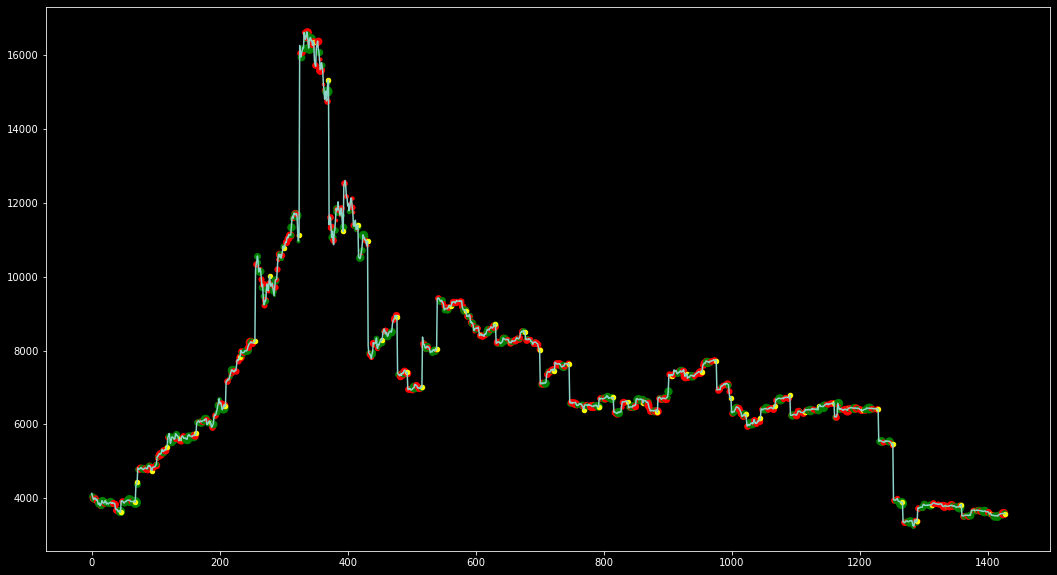

In [39]:
algo.plot()

In [45]:
algo.cash

108795.193106483

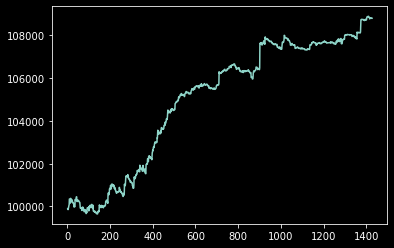

In [46]:
plt.plot(list(algo.metrics['Portfolio Marked']))

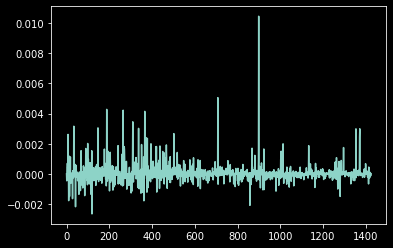

In [47]:
returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
plt.plot(returns)

In [48]:
sr = ((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
sr

8.54931390014353

In [18]:
x = pd.DataFrame(algo.metrics['Position USD'])

In [23]:
x = x.dropna()
x[x['Position USD']!=0].index.size

1020

##### Generate Random Strategies

In [ ]:
strategy = BitcoinRandomStrategy()
sr = []
for i in range(0,100):
    loading_bar(i, 99)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(0.01)
    algo.run(split = True, verbose = False)
    returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
    sr.append((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
np.mean(sr)

In [ ]:
np.median(sr)

### Plotting and Testing

In [ ]:
#Prints a simple loading bar
def loading_bar(n,N, message = ''):
    prc  = math.floor(n/N*100)
    a = prc*'#'
    b = (100-prc)*'_'
    clear_output(wait=True)
    display('|' + a + b + '|' + str(prc) + '%' + " " + message)